In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator

In [2]:
data = pd.read_csv("/content/drive/MyDrive/NASA Hackathon/Datasets/Final Datasets/5_year_dataset.csv")
data.head()

,Timestamp,Date,Time,Kp,ap,SN,F10.7obs,F10.7adj,Source,Bt-med,...,Theta-max,Dens-med,Dens-min,Dens-max,Speed-med,Speed-min,Speed-max,Temp-med,Temp-min,Temp-max
0,2019-05-04 00:00:00,2019-05-04,00:00:00,2.667,12,12,72.3,73.5,1,4.35,...,62.22,6.87,3.50,9.10,482.0,391.5,515.4,179360,55436,303319
1,2019-05-05 00:00:00,2019-05-05,00:00:00,1.333,5,12,73.5,74.7,1,3.46,...,65.63,4.22,1.27,5.85,434.4,359.7,494.9,122091,25719,334905
2,2019-05-06 00:00:00,2019-05-06,00:00:00,1.667,6,16,76.0,77.3,1,4.01,...,66.19,4.46,2.11,7.36,374.0,322.5,392.8,43075,12791,75843
3,2019-05-07 00:00:00,2019-05-07,00:00:00,2.000,7,26,78.7,80.1,1,3.73,...,53.41,4.70,2.37,11.02,351.9,327.4,382.2,29746,11704,55111
4,2019-05-08 00:00:00,2019-05-08,00:00:00,1.000,4,25,75.3,76.8,1,2.62,...,54.93,9.84,8.17,16.65,326.4,307.4,341.5,12476,7815,16210


In [3]:
data.describe()

,Kp,ap,SN,F10.7obs,F10.7adj,Source,Bt-med,Bt-min,Bt-max,Bx-med,...,Theta-max,Dens-med,Dens-min,Dens-max,Speed-med,Speed-min,Speed-max,Temp-med,Temp-min,Temp-max
count,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,...,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1.447000e+03,1447.000000,1.447000e+03
mean,2.748205,16.857636,56.341396,105.296683,105.583068,0.980650,-2136.999288,-2139.285404,-2134.231997,-2142.203656,...,-2084.683670,-3586.609482,-3589.992225,-3579.448328,-3190.906358,-3231.947270,-3141.722184,1.354800e+05,48984.652384,3.473889e+05
std,1.265671,18.332390,55.009991,39.146555,39.271824,0.195839,14484.831088,14484.492622,14485.241032,14484.060868,...,14492.583448,18620.766083,18620.112617,18622.150991,18697.360433,18689.394997,18706.906307,1.562514e+05,76947.472199,3.742495e+05
min,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,...,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-9.999900e+04,-99999.000000,-9.999900e+04
25%,1.667000,6.000000,8.000000,72.600000,72.700000,1.000000,3.910000,1.870000,5.485000,-2.375000,...,47.110000,4.750000,1.860000,8.385000,341.250000,310.650000,384.700000,3.407800e+04,10279.000000,1.105030e+05
50%,2.667000,12.000000,38.000000,89.000000,89.100000,1.000000,4.930000,2.850000,7.100000,0.240000,...,60.580000,6.730000,3.450000,12.020000,405.700000,360.300000,467.400000,8.384800e+04,21146.000000,2.571740e+05
75%,3.667000,22.000000,96.000000,136.500000,135.950000,1.000000,6.260000,4.020000,9.655000,2.445000,...,71.955000,9.130000,5.120000,16.930000,479.100000,422.800000,532.350000,1.986510e+05,66269.500000,4.618155e+05
max,8.333000,236.000000,240.000000,343.100000,335.000000,1.000000,28.090000,15.770000,33.710000,9.500000,...,88.410000,28.980000,12.390000,76.300000,647.900000,570.800000,768.000000,1.908052e+06,670706.000000,5.052996e+06


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1447 entries, 0 to 1446
Data columns (total 36 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  1447 non-null   object 
 1   Date       1447 non-null   object 
 2   Time       1447 non-null   object 
 3   Kp         1447 non-null   float64
 4   ap         1447 non-null   int64  
 5   SN         1447 non-null   int64  
 6   F10.7obs   1447 non-null   float64
 7   F10.7adj   1447 non-null   float64
 8   Source     1447 non-null   int64  
 9   Bt-med     1447 non-null   float64
 10  Bt-min     1447 non-null   float64
 11  Bt-max     1447 non-null   float64
 12  Bx-med     1447 non-null   float64
 13  Bx-min     1447 non-null   float64
 14  Bx-max     1447 non-null   float64
 15  By-med     1447 non-null   float64
 16  By-min     1447 non-null   float64
 17  By-max     1447 non-null   float64
 18  Bz-med     1447 non-null   float64
 19  Bz-min     1447 non-null   float64
 20  Bz-max  

In [5]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame
# Replace outliers with median for each column
for column in data.columns:
    if data[column].dtype in ['float64', 'int64']:  # Chdeck if the column is numeric
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Replace outliers with median
        data[column] = np.where((data[column] < lower_bound) | (data[column] > upper_bound),
                              data[column].median(), data[column])


In [6]:
data.describe()

,Kp,ap,SN,F10.7obs,F10.7adj,Source,Bt-med,Bt-min,Bt-max,Bx-med,...,Theta-max,Dens-med,Dens-min,Dens-max,Speed-med,Speed-min,Speed-max,Temp-med,Temp-min,Temp-max
count,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.0,1447.000000,1447.000000,1447.000000,1447.000000,...,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000
mean,2.727474,13.290256,56.068417,104.672564,105.065930,1.0,5.121265,3.023787,7.604257,0.143573,...,59.099496,7.066344,3.699509,12.760802,417.279129,374.606704,468.472840,109912.959226,33415.107118,285916.035245
std,1.224772,8.733257,54.608301,37.869603,38.192282,0.0,1.587176,1.422915,2.704662,2.828500,...,16.081077,2.775282,2.139626,5.334627,79.725079,70.005659,89.644573,107412.141412,32543.333130,230517.773797
min,0.000000,0.000000,0.000000,-1.000000,-1.000000,1.0,1.540000,0.240000,2.720000,-9.550000,...,12.570000,0.180000,0.100000,0.640000,247.700000,244.700000,249.000000,-99999.000000,5000.000000,-99999.000000
25%,1.667000,6.000000,8.000000,72.600000,72.700000,1.0,3.985000,1.925000,5.620000,-2.185000,...,48.495000,5.040000,2.155000,8.960000,350.800000,317.100000,398.250000,34078.000000,11150.500000,110503.000000
50%,2.667000,12.000000,38.000000,89.000000,89.100000,1.0,4.930000,2.850000,7.100000,0.240000,...,60.580000,6.730000,3.450000,12.020000,405.700000,360.300000,467.400000,83848.000000,21146.000000,257174.000000
75%,3.500000,18.000000,96.000000,135.900000,135.700000,1.0,5.995000,3.945000,9.040000,2.445000,...,71.955000,9.000000,5.090000,15.250000,479.100000,422.800000,532.100000,169597.000000,45794.000000,413152.500000
max,6.667000,39.000000,223.000000,228.100000,226.700000,1.0,9.780000,7.220000,15.900000,9.500000,...,88.410000,15.610000,9.840000,29.550000,647.900000,570.800000,736.700000,445300.000000,149694.000000,987453.000000


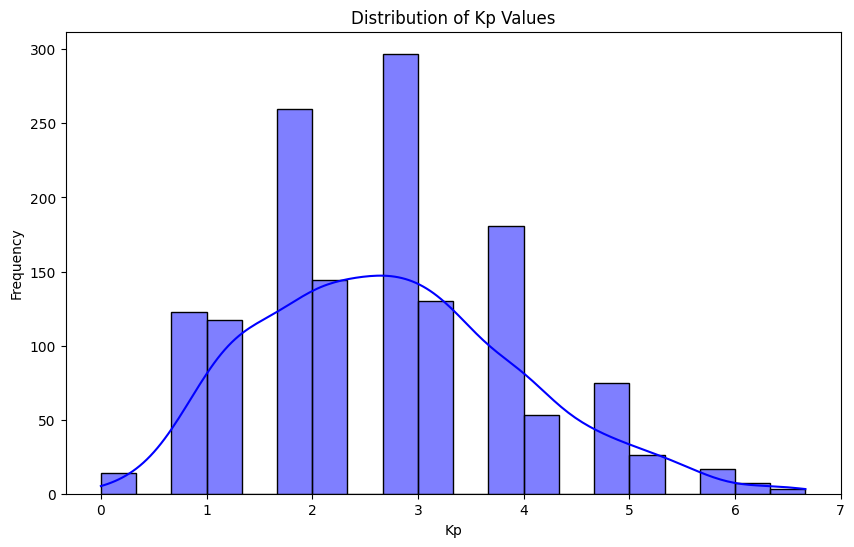

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['Kp'], bins=20, kde=True, color='blue')
plt.title('Distribution of Kp Values')
plt.xlabel('Kp')
plt.ylabel('Frequency')
plt.show()

In [8]:
!pip install feature-engine

In [9]:
data.columns

Index(['Timestamp', 'Date', 'Time', 'Kp', 'ap', 'SN', 'F10.7obs', 'F10.7adj',
       'Source', 'Bt-med', 'Bt-min', 'Bt-max', 'Bx-med', 'Bx-min', 'Bx-max',
       'By-med', 'By-min', 'By-max', 'Bz-med', 'Bz-min', 'Bz-max', 'Phi-mean',
       'Phi-min', 'Phi-max', 'Theta-med', 'Theta-min', 'Theta-max', 'Dens-med',
       'Dens-min', 'Dens-max', 'Speed-med', 'Speed-min', 'Speed-max',
       'Temp-med', 'Temp-min', 'Temp-max'],
      dtype='object')

In [10]:
df = data.copy()
df.set_index('Timestamp', inplace=True)
df

,Date,Time,Kp,ap,SN,F10.7obs,F10.7adj,Source,Bt-med,Bt-min,...,Theta-max,Dens-med,Dens-min,Dens-max,Speed-med,Speed-min,Speed-max,Temp-med,Temp-min,Temp-max
Timestamp,,,,,,,,,,,,,,,,,,,,,
2019-05-04 00:00:00,2019-05-04,00:00:00,2.667,12.0,12.0,72.3,73.5,1.0,4.35,2.24,...,62.22,6.87,3.50,9.10,482.0,391.5,515.4,179360.0,55436.0,303319.0
2019-05-05 00:00:00,2019-05-05,00:00:00,1.333,5.0,12.0,73.5,74.7,1.0,3.46,1.62,...,65.63,4.22,1.27,5.85,434.4,359.7,494.9,122091.0,25719.0,334905.0
2019-05-06 00:00:00,2019-05-06,00:00:00,1.667,6.0,16.0,76.0,77.3,1.0,4.01,2.73,...,66.19,4.46,2.11,7.36,374.0,322.5,392.8,43075.0,12791.0,75843.0
2019-05-07 00:00:00,2019-05-07,00:00:00,2.000,7.0,26.0,78.7,80.1,1.0,3.73,1.28,...,53.41,4.70,2.37,11.02,351.9,327.4,382.2,29746.0,11704.0,55111.0
2019-05-08 00:00:00,2019-05-08,00:00:00,1.000,4.0,25.0,75.3,76.8,1.0,2.62,0.86,...,54.93,9.84,8.17,16.65,326.4,307.4,341.5,12476.0,7815.0,16210.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-02 00:00:00,2023-10-02,00:00:00,3.333,18.0,173.0,157.4,157.7,1.0,4.93,2.85,...,60.58,6.73,3.45,12.02,405.7,360.3,467.4,-99999.0,21146.0,-99999.0
2023-10-03 00:00:00,2023-10-03,00:00:00,2.333,9.0,148.0,153.7,153.8,1.0,7.58,5.56,...,18.12,4.37,1.76,9.68,339.3,314.3,436.6,62372.0,10025.0,209472.0
2023-10-04 00:00:00,2023-10-04,00:00:00,3.667,22.0,159.0,155.0,155.1,1.0,7.82,5.73,...,35.09,3.34,0.91,7.22,407.1,328.4,474.4,121306.0,6533.0,464060.0


In [56]:
# split data into train and test
train = df[df['Date'] <= '2023-01-01']
test = df[df['Date'] > '2023-01-01']
train = train.drop(['Date','Time'],axis=1)
test = test.drop(['Date','Time'],axis=1)
print(train.shape, test.shape)

# Reshape the training and testing sets into the required format for LSTM input
X_train = train.drop(['Kp'], axis=1).values.reshape((train.shape[0], 1, train.shape[1]-1))
y_train = train['Kp'].values
X_test = test.drop(['Kp'], axis=1).values.reshape((test.shape[0], 1, test.shape[1]-1))
y_test = test['Kp'].values

print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(1169, 33) (278, 33)
(1169, 1, 32) (1169,) (278, 1, 32) (278,)


In [81]:
from sklearn.preprocessing import StandardScaler

# Assuming X_train and X_test are your training and testing sets

# Reshape the training and testing sets into 2D arrays
X_train_2d = X_train.reshape((X_train.shape[0], X_train.shape[2]))
X_test_2d = X_test.reshape((X_test.shape[0], X_test.shape[2]))

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training set
X_train_scaled = scaler.fit_transform(X_train_2d)

# Transform the testing set using the same scaler
X_test_scaled = scaler.transform(X_test_2d)

# Reshape the scaled sets back to the required format for LSTM input
X_train_scaled = X_train_scaled.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test_scaled = X_test_scaled.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

print(X_train_scaled.shape, X_test_scaled.shape)


(1169, 1, 32) (278, 1, 32)


In [83]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional

In [88]:
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dense, Dropout

# Assuming you have X_train_scaled shape information
input_shape = (X_train_scaled.shape[1], X_train_scaled.shape[2])

# Build the model
model = Sequential()
model.add(Bidirectional(LSTM(50, input_shape=input_shape, return_sequences=True)))
model.add(LSTM(1024, activation='relu'))
model.add(Dense(64))
model.add(Dropout(0.2))
model.add(Dense(1))

import keras
model.compile(loss=keras.losses.MeanSquaredError(), optimizer=keras.optimizers.Adam(), metrics=[keras.metrics.MeanAbsoluteError()])
model.summary()


ValueError: ignored

In [76]:
early_stopping=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5,mode='min',verbose=1)

In [77]:
hist = model.fit(X_train_scaled, y_train_scaled, epochs=100, validation_data=(X_test_scaled, y_test_scaled))

Epoch 1/100
37/37 [==============================] - 27s 385ms/step - loss: 0.8762 - mean_absolute_error: 0.7558 - val_loss: 0.5851 - val_mean_absolute_error: 0.5583
Epoch 2/100
37/37 [==============================] - 11s 310ms/step - loss: 0.3339 - mean_absolute_error: 0.4177 - val_loss: 0.4474 - val_mean_absolute_error: 0.4588
Epoch 3/100
37/37 [==============================] - 14s 378ms/step - loss: 0.2340 - mean_absolute_error: 0.3470 - val_loss: 0.4680 - val_mean_absolute_error: 0.4689
Epoch 4/100
37/37 [==============================] - 13s 356ms/step - loss: 0.1927 - mean_absolute_error: 0.3075 - val_loss: 0.3543 - val_mean_absolute_error: 0.4054
Epoch 5/100
37/37 [==============================] - 13s 340ms/step - loss: 0.1520 - mean_absolute_error: 0.2650 - val_loss: 0.3777 - val_mean_absolute_error: 0.4027
Epoch 6/100
37/37 [==============================] - 15s 392ms/step - loss: 0.1345 - mean_absolute_error: 0.2436 - val_loss: 0.3412 - val_mean_absolute_error: 0.3940
Epoc

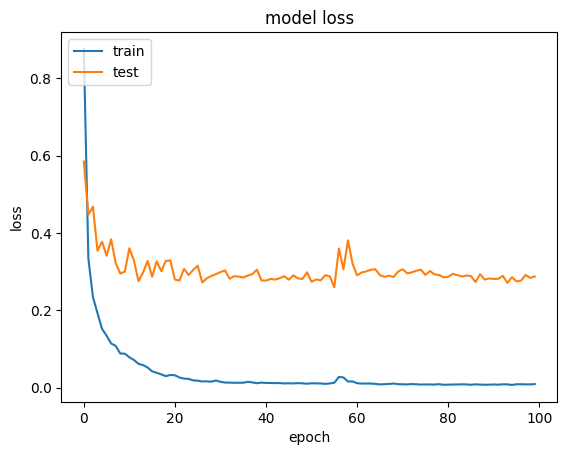

In [79]:
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [80]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Assuming you have trained your LSTM model and made predictions
# Replace 'model' with your actual LSTM model

# Make predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Inverse transform the scaled predictions to the original scale
y_train_pred_original = scaler_y.inverse_transform(y_train_pred.reshape(-1, 1)).flatten()
y_test_pred_original = scaler_y.inverse_transform(y_test_pred.reshape(-1, 1)).flatten()

# Inverse transform the original target variables
y_train_original = scaler_y.inverse_transform(y_train.reshape(-1, 1)).flatten()
y_test_original = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Evaluate the model
def evaluate_model(y_true, y_pred, prefix=''):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)

    print(f'{prefix}R2 Score: {r2:.4f}')
    print(f'{prefix}Root Mean Squared Error (RMSE): {rmse:.4f}')
    print(f'{prefix}Mean Absolute Error (MAE): {mae:.4f}')

# Evaluate on training data
evaluate_model(y_train_original, y_train_pred_original, prefix='Train ')

# Evaluate on testing data
evaluate_model(y_test_original, y_test_pred_original, prefix='Test ')

9/9 [==============================] - 1s 74ms/step
Train R2 Score: -3.7431
Train Root Mean Squared Error (RMSE): 3.2507
Train Mean Absolute Error (MAE): 3.2380
Test R2 Score: -5.4447
Test Root Mean Squared Error (RMSE): 3.5534
Test Mean Absolute Error (MAE): 3.4613
